# Tutorial: Using SMADI for Soil Moisture Anomaly Detection


### Introduction

In this tutorial, we will explore how to use the SMADI (Soil Moisture Anomaly Detection Indices) package for computing and plotting anomalies in soil moisture observations, particularly focusing on [ASCAT](https://hsaf.meteoam.it/Products/ProductsList?type=soil_moisture) surface soil moisture CDR time-series products.

This workflow can be applied to different meteorological variables and across various spatial scales. Whether you're analyzing a single grid data point by its grid ID or latitude and longitude coordinates, conducting country-level analysis based on country names, or defining a custom area of interest (AOI) using a bounding box defined by minimum and maximum latitude and longitude coordinates.


## Table of Contents

[1. Installation](#1-installation) 

[2. Loading the data](#2-loading-ascat-data) 

[3. Computing the climatology](#3-computing-the-climatology)

[4. Plot the climatology](#4-plot-the-climatology)

[5. Detecting the Anomalies](#5-detecting-the-anomalies) 

[5. Applying the workflow on a country or bbox](#5-applying-workflow-on-a-country-scale-or-bbox)


To launch an interactive environment for running this notebook via Binder platform. Click here [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/MuhammedM294/SMADI_Tutorial/main?labpath=Tutorial.ipynb)



### 1. Installation

In this section, we'll cover how to install the SMADI package.

#### 1. Prerequisites

Before installing SMADI, 

- Ensure Python 3.x is installed on your system.
- Create a virtual environment (optional but recommended) to manage dependencies and ensure isolation from other Python installations.


```bash
# Create a virtual environment named 'smadi_env' using python3 -m venv
python3 -m venv smadi_env

# Alternatively, if you have virtualenv installed, you can use:
# virtualenv smadi_env

# Activate the virtual environment

# On Windows
smadi_env\Scripts\activate

# On Unix or MacOS
source smadi_env/bin/activate

``` 

#### 2. Installing SMADI

You can install SMADI using pip, which is the recommended method:




In [1]:
%%capture --no-display
! pip install smadi

This command will download and install the latest version of SMADI along with its dependencies. Also, a full list of dependencies required to run this notebook is available in the file requiremets.txt at [SMADI](https://github.com/MuhammedM294/smadi) github repo.

##### 1.3 Verifying Installation

To verify that SMADI has been installed correctly, you can run the following command in your Python environment:


In [2]:
import smadi

print(smadi.__version__)

0.2.7


If SMADI has been installed successfully, this command will print the version number of the installed package.

### 2. Loading ASCAT Data

To load soil moisture data from a specific grid data point, you can use the `read_grid_point` function provided by SMADI. This function allows you to extract ASCAT soil moisture time series for a given location.

- If you already have the data downloaded in NetCDF format on your local machine, follow these steps to load the data:

_Note: It is important to execute the cells sequentially, starting from the top and moving downwards. Certain later examples rely on the results or data generated by preceding cells!_


In [3]:
import pandas as pd
from smadi.data_reader import read_grid_point

# Set display options
pd.set_option("display.max_columns", 8)  # Limit the number of columns displayed
pd.set_option("display.precision", 2)  # Set precision to 2 decimal places


# Define the path to the ASCAT data
# Adjust the path based on the notebook's environment
# For local machine:
data_path = "/home/m294/VSA/Code/datasets"

# Define the coordinates of the observation point
# Example: A grid point in Morocco
lon = -7.382
lat = 33.348

# Alternatively, you can define the location using a Fibonaci grid ID
# For more information, see: https://dgg.geo.tuwien.ac.at/
gpid = 3611180

# Define the location of the observation point
loc = (lon, lat)  # or loc = gpid

# Extract ASCAT soil moisture time series for the given location
data = read_grid_point(loc=loc, ascat_sm_path=data_path, read_bulk=False)

# Get the ASCAT soil moisture time series
ascat_ts = data.get("ascat_ts")


# Display the first few rows of the time series data
ascat_ts.head()

ASCAT GPI: 3611180 - distance:   23.713 m


,sm,sm_noise,as_des_pass,ssf,...,curvature40_noise,sigma40,sigma40_noise,num_sigma
2007-01-01 21:02:04.161,34.86,3.24,0,0,...,1.20e-04,-12.27,0.19,3
2007-01-02 11:03:22.807,23.16,3.27,1,0,...,1.20e-04,-13.05,0.19,3
2007-01-03 10:42:47.739,33.05,3.23,1,0,...,1.20e-04,-12.39,0.19,3
2007-01-03 22:00:39.007,25.60,3.24,0,0,...,1.20e-04,-12.88,0.19,3
2007-01-05 10:01:27.519,28.73,3.24,1,0,...,1.21e-04,-12.67,0.19,3


In the above code:

- `loc`: Specifies the location of the observation point. You can define it either by providing latitude and longitude coordinates or by specifying the grid point ID.
- `ascat_sm_path`: Specifies the path to the ASCAT soil moisture data file or directory.
- `read_bulk`: Determines whether to load the entire ASCAT dataset into memory (`True`) or read only the necessary data for the specified location (`False`), which can be more memory-efficient.



In [4]:
# Extract the soil moisture time series from the ASCAT dataset
sm_ts = ascat_ts.get("sm")
sm_ts.head()

2007-01-01 21:02:04.161    34.86
2007-01-02 11:03:22.807    23.16
2007-01-03 10:42:47.739    33.05
2007-01-03 22:00:39.007    25.60
2007-01-05 10:01:27.519    28.73
Name: sm, dtype: float32

#### Plotting the Time Series

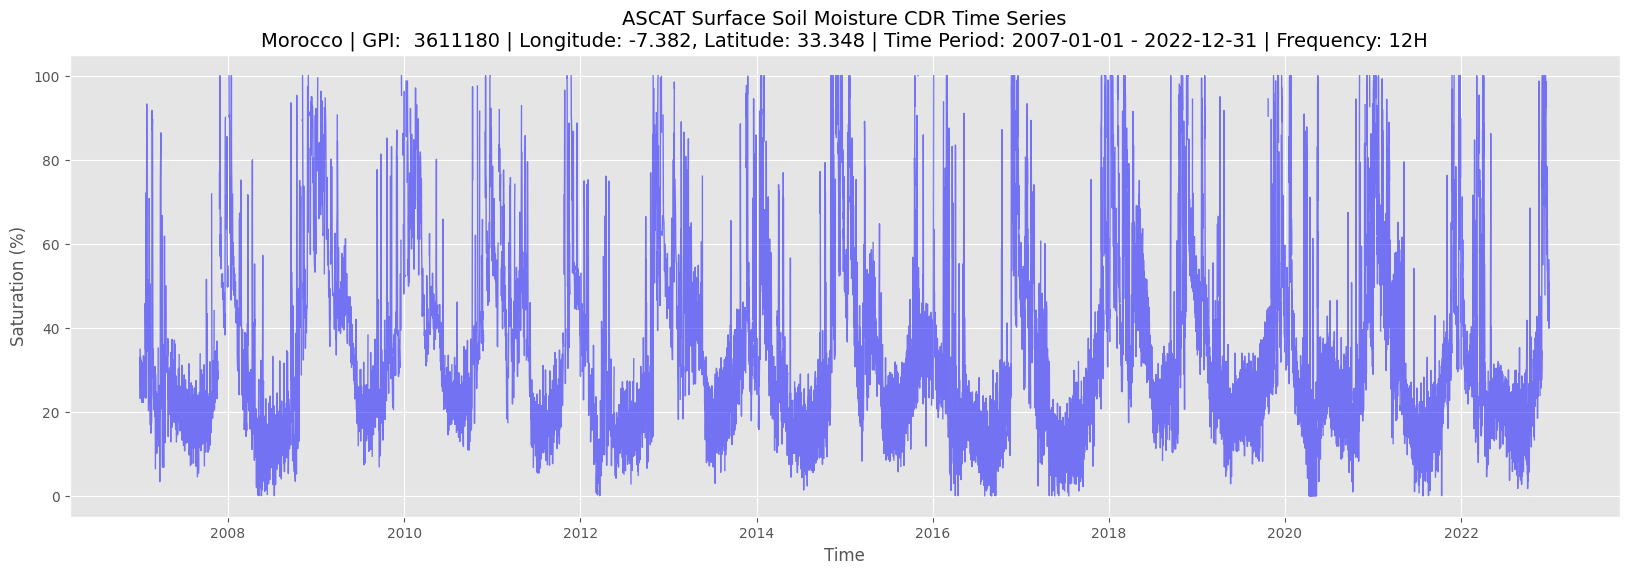

In [8]:
# Plot the time series
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(20, 6))
plt.style.use("ggplot")

# Plot the time series
plt.plot(
    sm_ts.index,
    sm_ts.values,
    color="blue",
    linewidth=1,
    alpha=0.5,
    label="ASCAT Soil Moisture",
)

# Set plot labels and title
plt.ylabel("Saturation (%)", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.title(
    f"ASCAT Surface Soil Moisture CDR Time Series\nMorocco | GPI:  {gpid} | Longitude: {lon}, Latitude: {lat} | Time Period: {sm_ts.index[0].date()} - {sm_ts.index[-1].date()} | Frequency: 12H",
    fontsize=14,
)

# Display plot
plt.show()

### 3. Computing the climatology

In this section, we'll explore how to compute climate normals (climatology) for the variable of interest using the `Climatology` class from the SMADI package. The class offers a range of functionalities:

- [Compute normals at various time steps](#31-compute-normals-at-various-time-steps), including monthly, bimonthly, dekadal, weekly, and daily intervals.
- Provide flexibility in [computing different metrics](#32-computing-the-normals-using-different-metrics-median-max-etc) such as mean, median, minimum, and maximum values.
- [Fill gaps in the time-series](#33-filling-the-gaps-and-smoothing-the-time-series-data-optional) with a user-defined window size, allowing for more robust analysis in the presence of missing data.
- [Smooth the data](#33-filling-the-gaps-and-smoothing-the-time-series-data-optional) by applying a rolling moving average window across the entire dataset with a user-defined size, helping to remove seasonality  and identify underlying trends.
- [Compute the climatology for a subset of the data](#34-computing-the-normals-for-a-subset-of-the-data) by specifying start and end dates, enabling analysis on specific time periods of interest.




#### 3.1 Compute normals at various time steps


#### Monthly 

In [9]:
from smadi.climatology import Climatology

# Create a climatology object
cl = Climatology(df=ascat_ts, variable="sm")

# Set the time step for computing the climatology
cl.time_step = "month"  # Supported time steps are "month", "bimonth", "dekad","week", "day"


cl_df = cl.compute_normals() 
cl_df.head(12)

,sm-avg,norm-mean
2007-01-01,33.69,56.54
2007-02-01,38.15,46.62
2007-03-01,25.63,36.69
2007-04-02,24.85,33.54
2007-05-01,24.21,28.73
2007-06-01,20.65,20.18
2007-07-01,18.21,17.30
2007-08-01,16.26,17.69
2007-09-01,19.23,21.68
2007-10-01,23.37,30.02


**_Note: You can filter the result to get a specific date range by passing date parameters (year, month, day, etc.) to the `compute_normals` method._

For bimonth and dekad parameters, they are only eligible for use when the time_step is set to 'bimonth' or 'dekad' where :


- **Dekad:** Values range from 1 to 3 for each month, corresponding to the first, second, and third dekads of the month.
- **Bimonth:** Bimonth values are 1 or 2 for each month, corresponding to the first and second half of the month.**



In [10]:
cl_df = cl.compute_normals(month = 2) # February
cl_df.head(16)

,sm-avg,norm-mean
2007-02-01,38.15,46.62
2008-02-01,44.75,46.62
2009-02-02,64.58,46.62
2010-02-02,78.51,46.62
2011-02-02,53.21,46.62
2012-02-01,25.46,46.62
2013-02-01,43.76,46.62
2014-02-01,46.80,46.62
2015-02-01,46.03,46.62
2016-02-01,42.02,46.62


#### Bimonthly

In [11]:
cl.time_step = "bimonth"
cl_df = cl.compute_normals(month = 5 , bimonth = 2 ) # The second half of May
cl_df.head(24)

,sm-avg,bimonth,norm-mean
2007-05-16,24.51,2,27.19
2008-05-17,15.44,2,27.19
2009-05-17,38.96,2,27.19
2010-05-17,40.61,2,27.19
2011-05-16,53.84,2,27.19
2012-05-16,15.11,2,27.19
2013-05-16,35.83,2,27.19
2014-05-16,15.53,2,27.19
2015-05-16,33.87,2,27.19
2016-05-16,18.85,2,27.19


In the above code:

-     cl_df : the resulted data frame  containing the SM monthly normals and average for each month
-     sm_avg : the monthly average for each month computed from the average of the daily observations
-     norm-mean: the monthly normal for each month computed from the sm-avg over the 16 years on observations (2007-2022)


#### 3.2 Computing the normals using different metrics (median, max, ..etc)

To compute the normals using different metrics such as mean, median, minimum, and maximum, you can specify the desired metrics by passing a list containing the metrics of interest. 

For example, to compute the normals using mean and median metrics, you can define the list of metrics as follows:



In [13]:
cl.normal_metrics = ["mean","median"]  # Supported metrics are "mean", "median", "std", "min", "max"

# Compute weekly-based climatology
cl.time_step = "week"
cl_df = cl.compute_normals(week = 12) # The 12th week of the year
cl_df.head(10)

,sm-avg,norm-mean,norm-median
2007-03-19,17.24,34.38,33.82
2008-03-17,35.11,34.38,33.82
2009-03-17,45.71,34.38,33.82
2010-03-22,41.76,34.38,33.82
2011-03-22,32.26,34.38,33.82
2012-03-19,10.64,34.38,33.82
2013-03-18,54.76,34.38,33.82
2014-03-17,21.66,34.38,33.82
2015-03-16,33.09,34.38,33.82
2016-03-22,50.84,34.38,33.82


In [14]:
# Compute normals with multiple metrics

# Set the metric for computing the climatology
cl.normal_metrics = ["mean", "median", "min", "max"]

cl.time_step = "dekad"
cl_df = cl.compute_normals(month = 7 , dekad = 3) # The third dekad of July

cl_df.head(12)

,sm-avg,dekad,norm-mean,norm-median,norm-min,norm-max
2007-07-22,16.20,3,17.24,17.43,11.74,23.73
2008-07-21,14.87,3,17.24,17.43,11.74,23.73
2009-07-21,18.01,3,17.24,17.43,11.74,23.73
2010-07-21,23.51,3,17.24,17.43,11.74,23.73
2011-07-21,17.28,3,17.24,17.43,11.74,23.73
2012-07-22,14.57,3,17.24,17.43,11.74,23.73
2013-07-22,18.76,3,17.24,17.43,11.74,23.73
2014-07-22,13.21,3,17.24,17.43,11.74,23.73
2015-07-22,17.77,3,17.24,17.43,11.74,23.73
2016-07-21,11.90,3,17.24,17.43,11.74,23.73


#### 3.3 Filling the gaps and smoothing the time series data (optional)

In [15]:
# Apply filling the gaps and smoothing the time series

cl.fillna = True
cl.fillna_window_size = 3  # number of days to fill the gaps by their mean value

cl.smoothing = True
cl.smooth_window_size = 31  # The moving average window size

cl.time_step = "dekad"
cl.normal_metrics = ["mean", "median"]
cl_df = cl.compute_normals()

cl_df

,sm-avg,dekad,norm-mean,norm-median
2007-01-01,31.01,1,56.56,53.74
2007-01-11,32.91,2,56.15,55.37
2007-01-21,36.22,3,54.60,55.32
2007-02-01,37.59,1,51.10,50.80
2007-02-11,36.08,2,46.69,46.69
...,...,...,...,...
2022-11-11,40.30,2,49.92,44.94
2022-11-21,52.38,3,55.90,54.35
2022-12-01,64.36,1,59.26,59.08
2022-12-11,70.12,2,60.27,59.25


#### 3.4 Computing the normals for a subset of the data

To work on a subset of the data instead of the entire historical record, users can specify the timespan, a class attribute of the Climatology class. By providing the timespan parameter, users can restrict the computation to a specific time period of interest, allowing for focused analysis within a defined timeframe.

In [16]:
# set start and end date for the climatology by providing 'timespan' parameter

cl.timespan = ("2010-01-01", "2020-12-31")  # ('start_date', 'end_date')
cl.time_step = "week"
cl.normal_metrics = ["mean", "median", "min", "max"]

cl.time_step = "month"

cl_df = cl.compute_normals(month = 1)
cl_df

,sm-avg,norm-mean,norm-median,norm-min,norm-max
2010-01-01,76.25,55.39,54.38,35.16,76.25
2011-01-01,61.99,55.39,54.38,35.16,76.25
2012-01-01,40.92,55.39,54.38,35.16,76.25
2013-01-01,55.06,55.39,54.38,35.16,76.25
2014-01-01,54.38,55.39,54.38,35.16,76.25
2015-01-01,64.39,55.39,54.38,35.16,76.25
2016-01-01,35.16,55.39,54.38,35.16,76.25
2017-01-01,52.05,55.39,54.38,35.16,76.25
2018-01-01,68.01,55.39,54.38,35.16,76.25
2019-01-01,50.95,55.39,54.38,35.16,76.25


### 4. Plot the Climatology

In [37]:
from ipywidgets import interact, SelectMultiple, Dropdown, Checkbox, IntSlider
from smadi.climatology import Climatology
from smadi.plot import plot_ts

# Define the plot parameters for the normals and raw observations
colms = {
    "sm-avg": {
        "color": "black",
        "label": "Monthly Average",
        "alpha": 0.7,
        "linewidth": 2,
    },
    "norm-mean": {
        "color": "blue",
        "label": "Normal Mean",
        "alpha": 0.7,
        "linewidth": 1.5,
    },
    "norm-median": {
        "color": "red",
        "label": "Normal Median",
        "alpha": 0.7,
        "linewidth": 1.5,
    },
    "norm-min": {
        "color": "green",
        "label": "Normal Min",
        "alpha": 0.7,
        "linewidth": 1.5,
    },
    "norm-max": {
        "color": "purple",
        "label": "Normal Max",
        "alpha": 0.7,
        "linewidth": 1.5,
    },
}

# Define the time-step options
time_step_options = ["month", "bimonth", "dekad", "week", "day"]

def plot_climatology(selected_normals, time_step, apply_smoothing, smoothing_window, apply_filling, filling_window , display_raw_data):
    # Create a climatology object with the selected time step, smoothing, and filling options
    cl = Climatology(
        df=ascat_ts,
        variable="sm",
        time_step=time_step,
        normal_metrics=["mean", "median", "min", "max"],
        fillna=apply_filling,
        fillna_window_size=filling_window,
        smoothing=apply_smoothing,
        smooth_window_size=smoothing_window,
    )
    
    # Compute normals
    cl_df = cl.compute_normals()

    # Prepare selected columns for plotting
    selected_columns = {"sm-avg": colms["sm-avg"]}
    for normal in selected_normals:
        if normal != "sm-avg":
            selected_columns[normal] = colms[normal]
    
    # Plot selected normals
    plot_ts(
        df=cl_df,
        x_axis=cl_df.index,
        colmns_kwargs=selected_columns,
        plot_raw=display_raw_data,
        clim_obj=cl,
        raw_var="sm",
        raw_kwargs={"color": "grey", "label": "Raw Observations", "alpha": 0.5},
        figsize=(17, 7),
        legend=True,
        grid=True,
        xlabel="Time",
        ylabel="Saturation (%)",
        title=f"Monthly Average vs Normals ({', '.join(selected_normals).capitalize()}) of ASCAT SSM CDR Time Series at GPI {gpid} (Morocco)",
    )


# Define the checkbox widget for selecting lines
normals_checkbox = SelectMultiple(
    options=list(colms.keys()),  
    value=["sm-avg"],  
    description="Plot Normals:",
    disabled=False,
)

# Define the dropdown widget for selecting the time step
time_step_dropdown = Dropdown(
    options=time_step_options,
    value="month",  
    description='Time Step:',
    disabled=False,
)

# Define the checkbox widget for applying smoothing
apply_smoothing_checkbox = Checkbox(
    value=False, 
    description='Apply Smoothing',
    disabled=False,
)

# Define the slider widget for selecting the smoothing window size
smoothing_window_slider = IntSlider(
    value=31,
    min=1,
    max=60,
    step=1,
    description='Smoothing Window:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Define the checkbox widget for selecting whether to fill gaps in the data
apply_filling_checkbox = Checkbox(
    value=False, 
    description='Apply Filling Gaps',
    disabled=False,
)

# Define the slider widget for selecting the filling window size
filling_window_slider = IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Filling Window:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display_raw_data = Checkbox(
    value=True, description='Display Raw Data', disabled=False)

# Display the interactive plot
interact(
    plot_climatology,
    selected_normals=normals_checkbox,
    time_step=time_step_dropdown,
    apply_smoothing=apply_smoothing_checkbox,
    smoothing_window=smoothing_window_slider,
    apply_filling=apply_filling_checkbox,
    filling_window=filling_window_slider , 
    display_raw_data = display_raw_data
    
)




interactive(children=(SelectMultiple(description='Plot Normals:', index=(0,), options=('sm-avg', 'norm-mean', …

<function __main__.plot_climatology(selected_normals, time_step, apply_smoothing, smoothing_window, apply_filling, filling_window, display_raw_data)>

### 5. Detecting the Anomalies


In this section, we'll cover different anomaly detection methods provided by SMADI. These methods compute anomalies based on the deviation from the climatology. The following anomaly detectors are available:

- ZScore
- SMAPI 
- SMDI
- SMCA
- SMAD
- SMCI
- SMDS
- ESSMI
- ParaDis
- AbsoluteAnomaly

For detailed information on how each index is computed, please refer to the [source code](https://github.com/MuhammedM294/smadi/blob/main/src/smadi/anomaly_detectors.py).


In [16]:
from smadi.anomaly_detectors import (
    ZScore,
    SMAPI,
    SMDI,
    SMCA,
    SMAD,
    SMCI,
    SMDS,
    ESSMI,
    ParaDis,
    AbsoluteAnomaly,
)

#### 4.1 Zscore Usage Example


In [17]:
zscore = ZScore(
    df=ascat_ts,
    variable="sm",
    fillna=True,
    fillna_window_size=3,
    smoothing=True,
    smooth_window_size=31,
    time_step="month",
)

anomaly_df = zscore.detect_anomaly()
anomaly_df

,sm-avg,norm-mean,zscore
2007-01-01,33.471936,55.734672,-1.687298
2007-02-01,35.623916,47.037372,-0.889188
2007-03-01,28.020249,37.128002,-0.809405
2007-04-01,27.934501,33.375276,-0.511452
2007-05-01,24.592070,28.083468,-0.294929
...,...,...,...
2022-08-01,16.960596,18.244689,-0.343926
2022-09-01,17.975225,21.880373,-0.999917
2022-10-01,23.155093,31.723001,-1.196212
2022-11-01,41.366666,49.871156,-0.791415


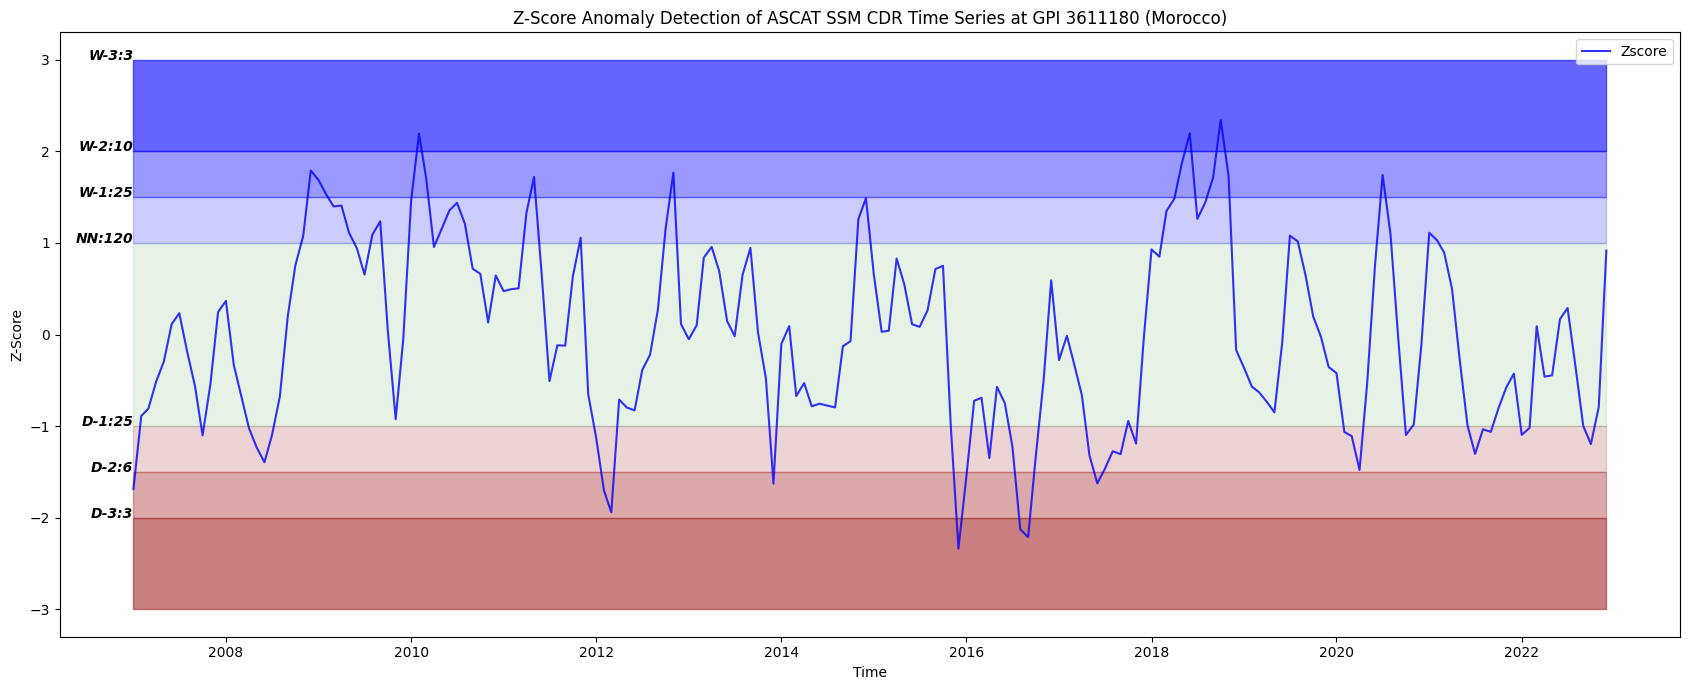

In [18]:
from smadi.plot import plot_anomaly

colm = {"zscore": {"color": "blue", "label": "Zscore", "alpha": 0.8, "linewidth": 1.5}}

plot_anomaly(
    df=anomaly_df,
    x_axis=anomaly_df.index,
    colmns=colm,
    thresholds="zscore",
    plot_hbars=True,
    plot_categories=True,
    figsize=(17, 7),
    grid=False,
    legend=True,
    xlabel="Time",
    ylabel="Z-Score",
    title=f"Z-Score Anomaly Detection of ASCAT SSM CDR Time Series at GPI {gpid} (Morocco)",
)

#### 4.2 SMAPI Usage Example

In [19]:
smapi = SMAPI(
    df=ascat_ts,
    variable="sm",
    fillna=True,
    fillna_window_size=3,
    smoothing=True,
    smooth_window_size=31,
    time_step="month",
    normal_metrics=["mean", "median"],
)

anomaly_df = smapi.detect_anomaly()
anomaly_df['smapi-mean'] = anomaly_df['smapi-mean'].clip(upper=100 , lower=-100)
anomaly_df['smapi-median'] = anomaly_df['smapi-median'].clip(upper=100 , lower=-100)
anomaly_df

,sm-avg,norm-mean,norm-median,smapi-mean,smapi-median
2007-01-01,33.471936,55.734672,54.718203,-39.944141,-38.828518
2007-02-01,35.623916,47.037372,47.141779,-24.264655,-24.432390
2007-03-01,28.020249,37.128002,35.583853,-24.530685,-21.255718
2007-04-01,27.934501,33.375276,28.206659,-16.301811,-0.964869
2007-05-01,24.592070,28.083468,23.700351,-12.432220,3.762471
...,...,...,...,...,...
2022-08-01,16.960596,18.244689,17.678374,-7.038170,-4.060199
2022-09-01,17.975225,21.880373,22.160417,-17.847722,-18.885891
2022-10-01,23.155093,31.723001,31.953248,-27.008505,-27.534462
2022-11-01,41.366666,49.871156,44.613189,-17.052923,-7.277047


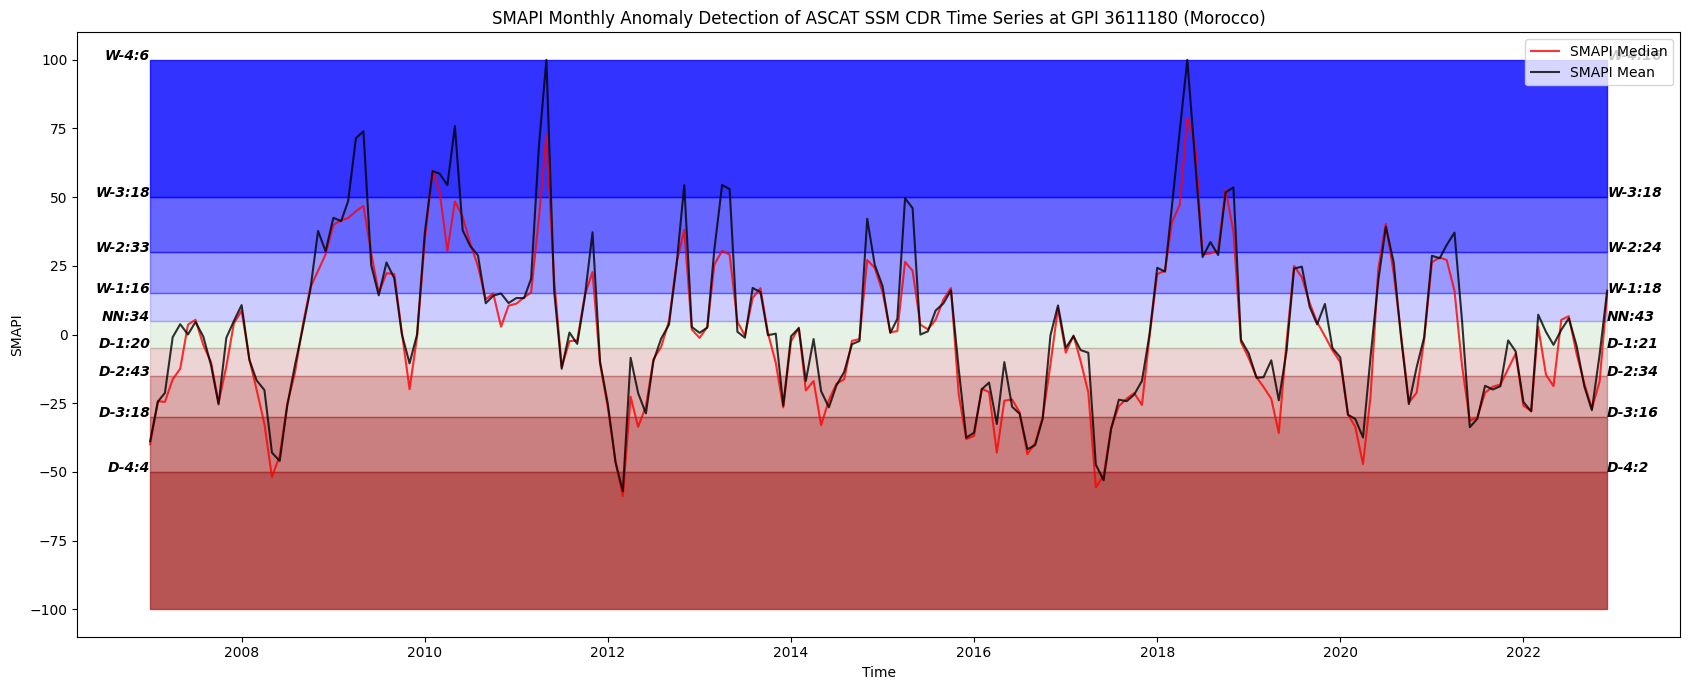

In [20]:
colms = {
    "smapi-mean": {
        "color": "red",
        "label": "SMAPI Median",
        "alpha": 0.8,
        "linewidth": 1.5,
    },
    "smapi-median": {
        "color": "black",
        "label": "SMAPI Mean",
        "alpha": 0.8,
        "linewidth": 1.5,
    },
    
}

plot_anomaly(
    df=anomaly_df,
    x_axis=anomaly_df.index,
    colmns=colms,
    thresholds="smapi",
    plot_hbars=True,
    plot_categories=True,
    figsize=(17, 7),
    grid=False,
    legend=True,
    xlabel="Time",
    ylabel="SMAPI",
    title=f"SMAPI Monthly Anomaly Detection of ASCAT SSM CDR Time Series at GPI {gpid} (Morocco)",
)

#### 4.3 ParaDis Usage Example

In [21]:
paradis = ParaDis(
    df=ascat_ts,
    variable="sm",
    fillna=True,
    fillna_window_size=3,
    smoothing=True,
    smooth_window_size=31,
    time_step="month",
    dist = ['beta','gamma'] 
)

anomaly_df = paradis.detect_anomaly()

# colm beta and gamma. for any value less than -4 set it to -4  and for any value greater than 4 set it to 4
anomaly_df['beta'] = anomaly_df['beta'].clip(lower=-3, upper=3)
anomaly_df['gamma'] = anomaly_df['gamma'].clip(lower=-3, upper=3)
anomaly_df

,sm-avg,norm-mean,beta,gamma
2007-01-01,33.471936,55.734672,-3.000000,-1.702506
2007-02-01,35.623916,47.037372,-0.619638,-0.867219
2007-03-01,28.020249,37.128002,-0.395972,-0.803120
2007-04-01,27.934501,33.375276,-0.198028,-0.402290
2007-05-01,24.592070,28.083468,-0.204429,0.226291
...,...,...,...,...
2022-08-01,16.960596,18.244689,-0.460257,-0.320492
2022-09-01,17.975225,21.880373,-0.183913,-0.986603
2022-10-01,23.155093,31.723001,-0.255801,-0.171316
2022-11-01,41.366666,49.871156,-0.235870,-0.461163


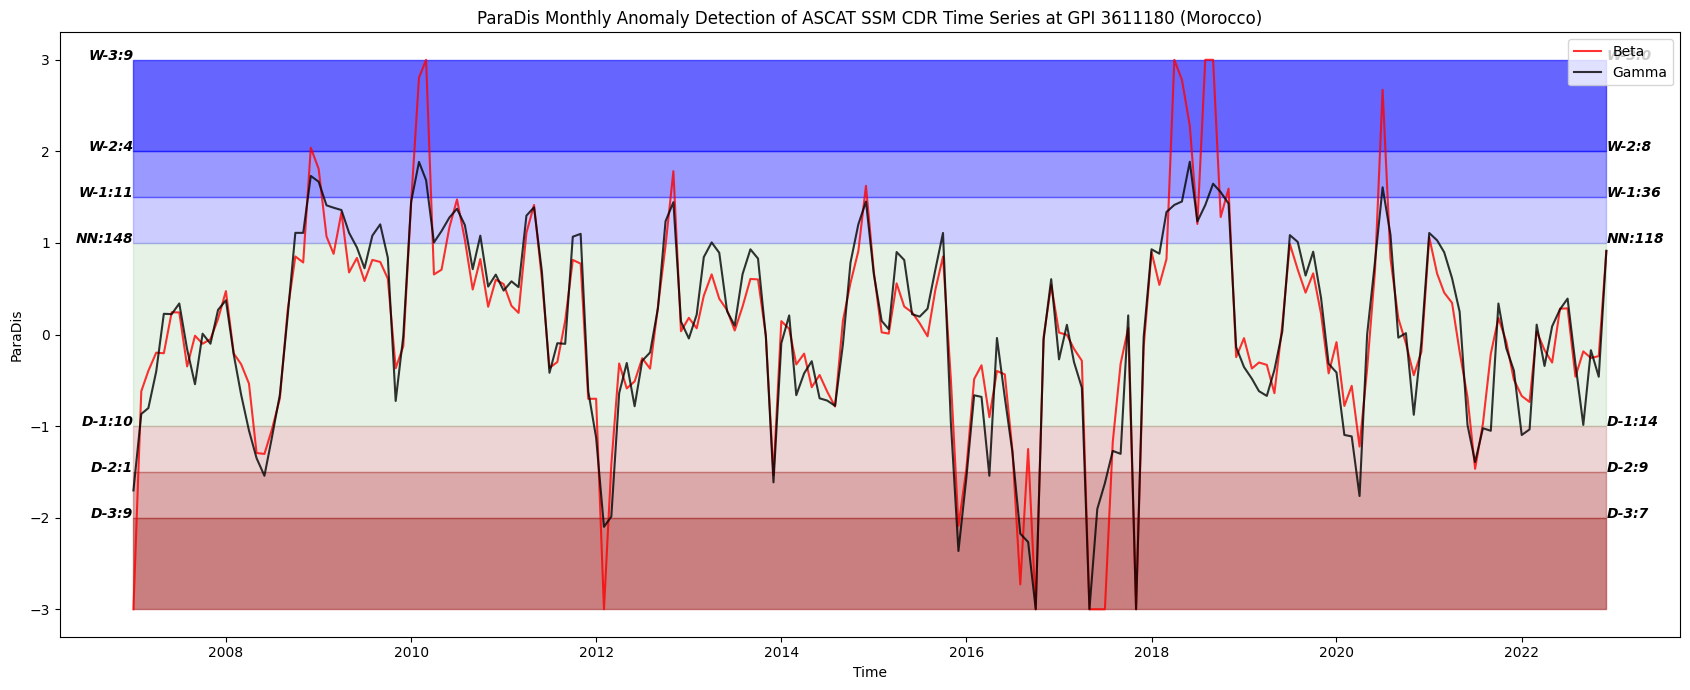

In [22]:
colms = {"beta": {"color": "red", "label": "Beta", "alpha": 0.8, "linewidth": 1.5},
        "gamma": {"color": "black", "label": "Gamma", "alpha": 0.8, "linewidth": 1.5}}


plot_anomaly(
    df=anomaly_df,
    x_axis=anomaly_df.index,
    colmns=colms,
    thresholds="zscore",
    plot_hbars=True,
    plot_categories=True,
    figsize=(17, 7),
    grid=False,
    legend=True,
    xlabel="Time",
    ylabel="ParaDis",
    title=f"ParaDis Monthly Anomaly Detection of ASCAT SSM CDR Time Series at GPI {gpid} (Morocco)",
)

### 5. Applying Workflow on a country scale or bbox

In [23]:
! run  -h

usage: run [-h] [--data_read_bulk DATA_READ_BULK] [--variable variable] --year
           [year ...] [--month [month ...]] [--dekad [dekad ...]]
           [--week [week ...]] [--bimonth [bimonth ...]] [--day [day ...]]
           [--methods [methods ...]] [--timespan timespan] [--fillna FILLNA]
           [--fillna_size FILLNA_SIZE] [--smoothing SMOOTHING]
           [--smooth_size SMOOTH_SIZE] [--workers workers] [--save_to SAVE_TO]
           data_path aoi time_step

Run the SMADI workflow for anomaly detection in ASCAT data

positional arguments:
  data_path             Path to the ASCAT data
  aoi                   Country name or bounding box coordinates in the tuple
                        'lon_min, lon_max , lat_min, lat_max'
  time_step             The time step for the climatology calculation.
                        Supported values: month, dekad, week, bimonth, day

options:
  -h, --help            show this help message and exit
  --data_read_bulk DATA_READ_BULK
          

In [31]:
# Compute four anomaly maps for Germany using the ZScore and SMAD methods for June and July 2021
! run   "/home/m294/VSA/Code/datasets"    \
        "Germany"                         \
        'month'                           \
        --variable "sm"                   \
        --year 2021 2021                  \
        --month 6 7                       \
        --methods 'zscore' 'smad'         \
        --fillna True                     \
        --fillna_size 3                   \
        --save_to "output_df.csv"


Saving the output data frame to output_df.csv....
Output saved successfully


In [25]:
workflow_df = pd.read_csv("output_df.csv")
workflow_df.head()

,Unnamed: 0,point,cell,grid,lat,lon,zscore(2021-6),zscore(2021-7),smad(2021-6),smad(2021-7)
0,0,4838920,1395,Fibonacci (6.25 km),47.344479,10.382991,-0.876612,1.352159,-0.944715,1.252402
1,1,4841504,1395,Fibonacci (6.25 km),47.377457,10.320685,-0.549212,1.611515,-0.477110,1.159104
2,2,4843101,1395,Fibonacci (6.25 km),47.397850,10.421497,-0.721812,1.469408,-0.625209,1.041969
3,3,4844088,1395,Fibonacci (6.25 km),47.410458,10.258380,-0.428590,1.438613,-0.186536,0.941893
4,4,4845685,1395,Fibonacci (6.25 km),47.430862,10.359192,-0.527157,1.375189,-0.186146,1.005243


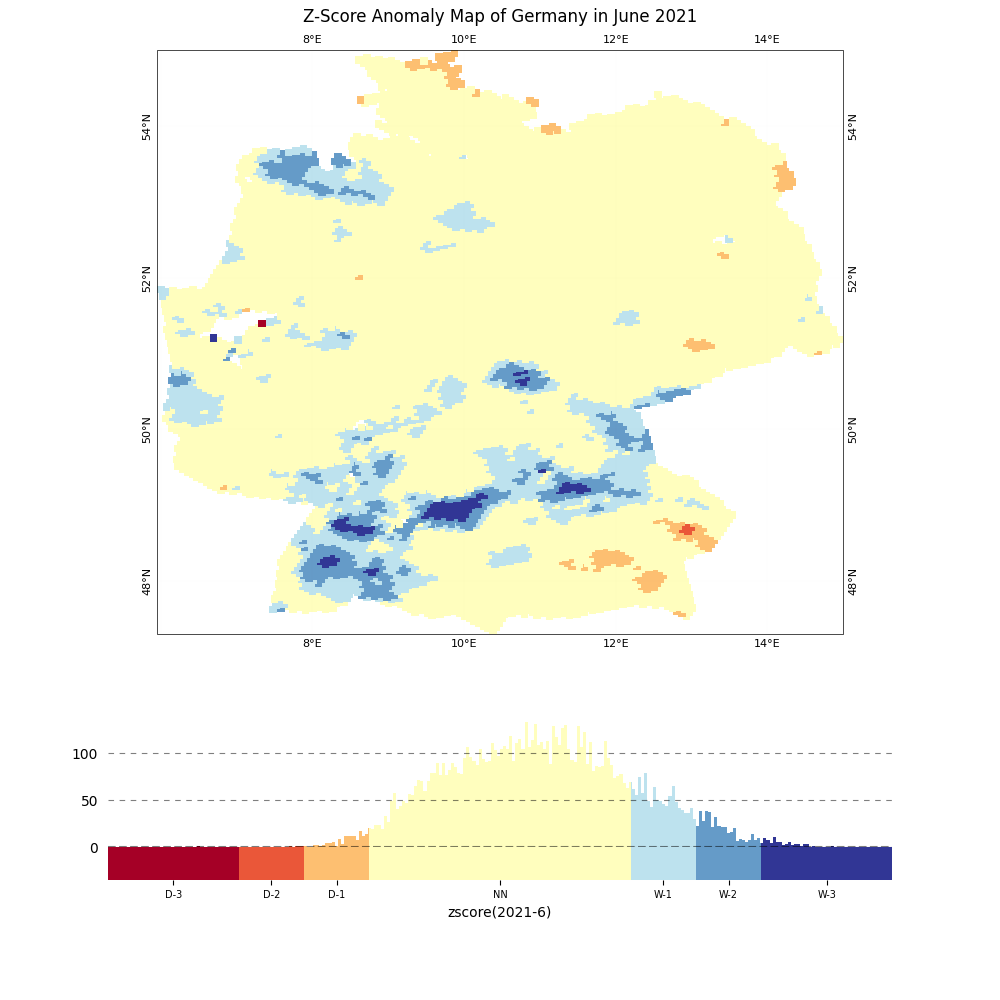

In [42]:
from smadi.map import plot_anomaly_map
plot_anomaly_map(df=workflow_df, 
                 colm='zscore(2021-6)',
                 x = 'lon',
                 y = 'lat',
                 title='Z-Score Anomaly Map of Germany in June 2021', figsize=(10, 10))

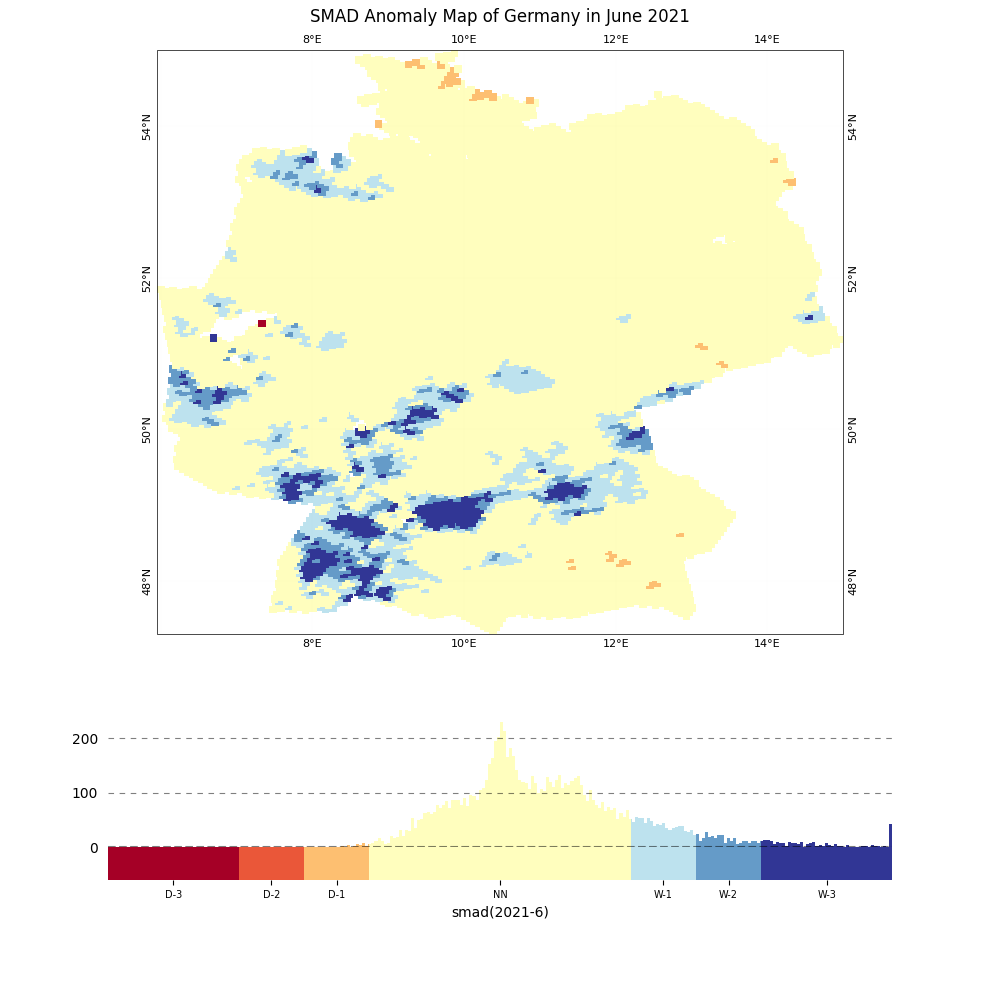

In [41]:
plot_anomaly_map(df=workflow_df, 
                 colm='smad(2021-6)',
                 x = 'lon',
                 y = 'lat',
                 title='SMAD Anomaly Map of Germany in June 2021', figsize=(10, 10))

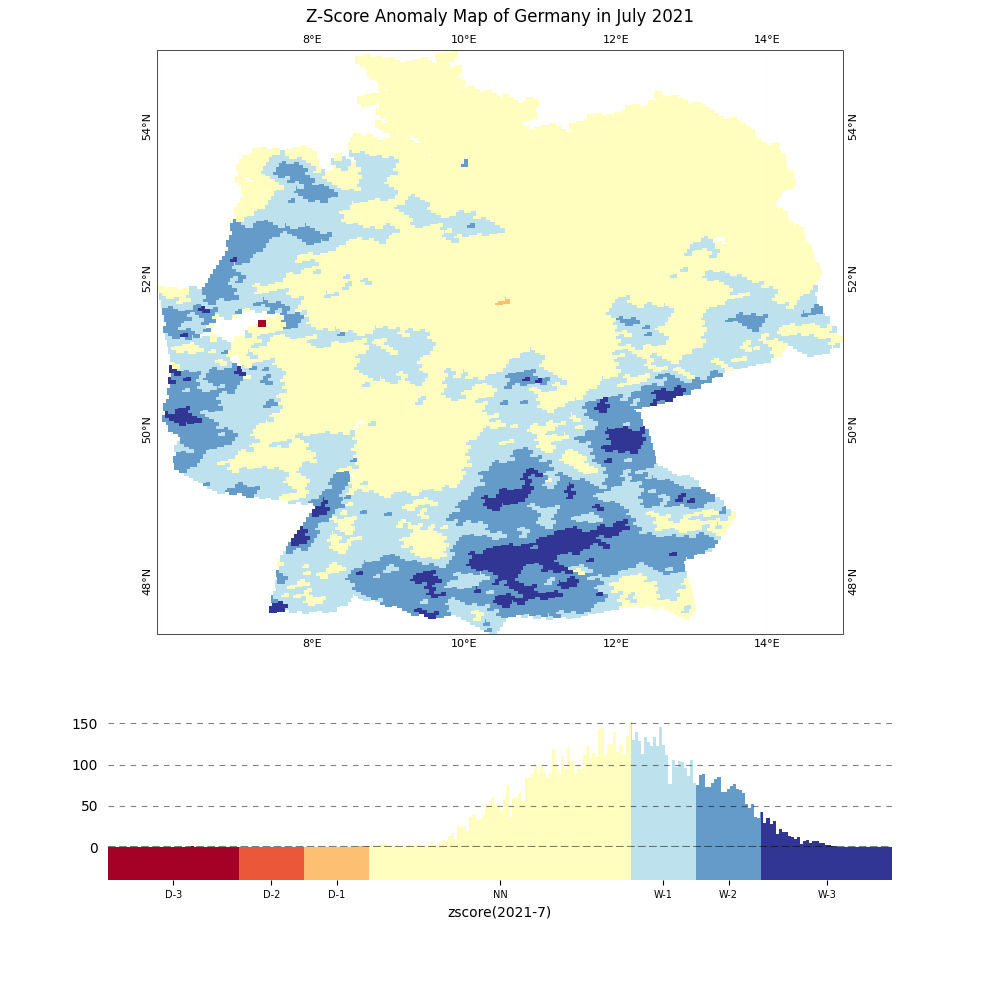

In [39]:
plot_anomaly_map(df=workflow_df, 
                 colm='zscore(2021-7)',
                 x = 'lon',
                 y = 'lat',
                 title='Z-Score Anomaly Map of Germany in July 2021', figsize=(10, 10))

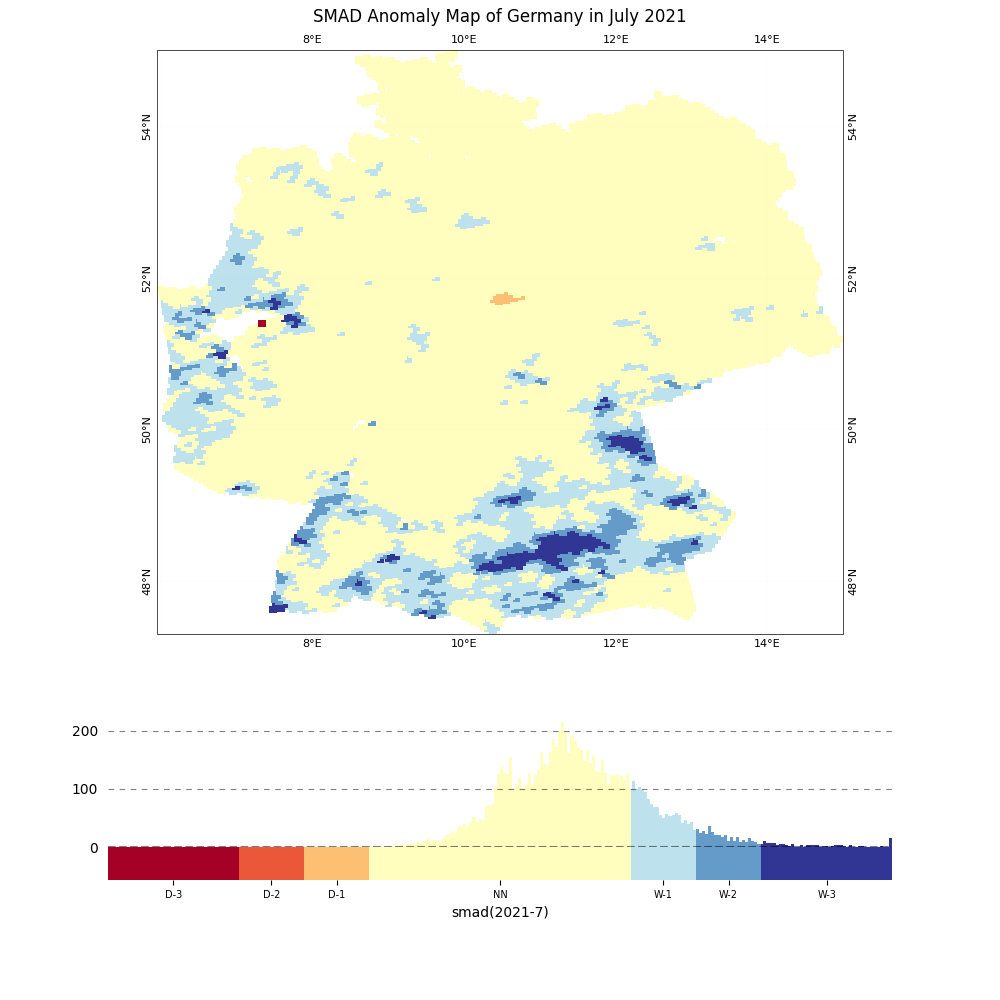

In [40]:
plot_anomaly_map(df=workflow_df, 
                 colm='smad(2021-7)',
                 x = 'lon',
                 y = 'lat',
                 title='SMAD Anomaly Map of Germany in July 2021', figsize=(10, 10))